# Data Analytics Course: Machine Problem 1
## Contents:
* [Introduction](#intro)
* [Problem Scenario](#scene)
* [Part 1: Data Ingestion](#ingest)
* [Part 2: Data Processing](#process)
* [Part 3: Data Enrichment](#enrich)
* [Part 4: Data Visualization](#plotting)

## Introduction <a class="anchor" id="intro"></a>

Welcome to the first machine problem of the data analytics course! 

This machine problem is designed to introduce you to some of the fundamental tasks faced by data analysts on a day-to-day basis.
On a higher level, these tasks include:
1. Data ingestion
2. Data processing, transformation and enrichment
3. Data visualization

Of course, this machine problem assumes that you have the pre-requisites of python under your belt, meaning you understand:
- python data types
- python [data structures](https://docs.python.org/3.5/tutorial/datastructures.html) (such as list, dict and tuple)
- python [control flows](https://docs.python.org/3.5/tutorial/controlflow.html) (if-else and for-loops)
- how to declare, build and call [python functions](https://docs.python.org/3.5/tutorial/modules.html)
- how to find help in [python documentation](https://docs.python.org/3/index.html) and [stackoverflow](https://stackoverflow.com/)

If the above python concepts sounds alien to you, please read up on them in the python documentation. There is no shortcut around a solid foundation in programming in data analytics.

We know that this machine problem subsequent homeworks will be a challenging, but the struggle is part of the learning process. When stuck, please proactively ask questions on [Piazza](https://piazza.com/), do a google search, or refer to some of the code already written as examples on how things are done. Happy learning!

## Scenario <a class="anchor" id="scene"></a>

In any **ideal** scenario, we always start a data analytics project or task with a **specific problem** in mind to solve. Otherwise this will happen:

<img src="./images/thor_nail.jpg" alt="drawing" width="400px"/>

---
But alas, the world is not ideal. After a lengthy meeting with the team operating the Snort Intrusion Detection System, who claimed they are "seeing a lot of alerts" everyday, there is a requirement to "do something useful" to make sense of the snort logs that are generated. The reality is some data science problems start like this, but in cases like these, we can start with some data exploration to formulate what may be useful to end-users.

## Part 1:Data Ingestion <a class="anchor" id="ingest"></a>

Regardless of the problem, the first step of any data problem is to ingest the data into any platform or tools that you are going use to analyse the data. As you can see from above, the logs are in **unstructured** format, meaning they come as free text. These data were originally collected more for humans to read than for machines to analyse. For data to be **machine readable** we will have to parse the data into some form of **structured** format in order to compute on them.

**Sample snort logs in raw form**
<img src="./images/sample_snort.png"/>

There are many forms of **data structures** to impose on the data. In the programming world, this usually means organizing the data into one of the following:
- array, also know as list in python.
- hashtable, also know as dict in python.
- and many others such as trees, graphs, linked-list etc.

In the relational database world, structured data usually means storing the data into columns and assigning a data type to each column.

For this part of the assignment, your task is write the code to parse the snort logs into a structured format:
```
Dict(
    'timestamp': string, 
    'msg': string, 
    'classification': string, 
    'priority': string, 
    'protocol': string,
    'src_ip': string,
    'dst_ip': string
)
```

Notice all the datatypes are strings? This is not the final correct structure but we will worry about the datatype later.

Next, you must read the snort logs from the file and call your parse() function to apply it to each line.

Ultimately, we want to convert the data into a Pandas DataFrame called ```snort_df```

**Hint:** The places to write code are marked with python's docstring
```python
"""
Problem n:
Some additional instructions to help you.
"""
# Write your code here
```

**Hint:** Python's [regular expression package](https://docs.python.org/3/library/re.html) will be useful.

In [1]:
import re

def parse(line):
    """
    Problem 1a:
    The parse function takes in each line of snort logs and parse it into a dictionary.
    :param: line (str) - a line of snort logs
    :return: (Dict) - a python dict containing the following keys:
            'timestamp': string, 'msg': string, 'classification': string, 'priority': string, 'protocol': string,'src_ip': string,
            'dst_ip': string
    """
    # Write your code here
    timestamp, msg, metadata = line.split(' [**] ')
    timestamp = timestamp.strip()
    pattern1 = re.compile("\[(.*)\] (.*)")
    pattern2 = re.compile("\[Classification: (.*)\] \[Priority: (.*)\] \{(.*)\} (.*) -> (.*)")
    match1 = pattern1.search(msg)
    match2 = pattern2.search(metadata.strip())
    return ({'timestamp': timestamp, 
             'msg': match1.group(2), 
             'classification': match2.group(1), 
             'priority': match2.group(2), 
             'protocol': match2.group(3),
             'src_ip': match2.group(4),
             'dst_ip': match2.group(5),
            })

In [2]:
"""
Problem 1b:
Write the code to open snort logs in "alert.fast" and send each line into the parse function declared above.
Put the return into a python list called parsed_data.
"""
# Write your code here
parsed_data = []
file = open("./data/alert.fast")

for line in file:
    parsed_data.append(parse(line))

In [3]:
# Print the first line of your parsed data for sanity check
print(parsed_data[0])

{'timestamp': '05/30-19:09:10.917356', 'msg': 'BAD-TRAFFIC same SRC/DST', 'classification': 'Potentially Bad Traffic', 'priority': '2', 'protocol': 'UDP', 'src_ip': '0.0.0.0:68', 'dst_ip': '255.255.255.255:67'}


**Expected output:**
<img src="./images/out1.png" width="100%"/>

In [4]:
"""
Problem 1c:
Convert your parsed_data into a Pandas DataFrame called snort_df.
"""
# Write your code here
import pandas as pd

snort_df = pd.DataFrame(parsed_data)

In [5]:
# Print 5 lines of your dataframe for sanity check.
snort_df.head()

,timestamp,msg,classification,priority,protocol,src_ip,dst_ip
0,05/30-19:09:10.917356,BAD-TRAFFIC same SRC/DST,Potentially Bad Traffic,2,UDP,0.0.0.0:68,255.255.255.255:67
1,05/30-19:09:10.918155,BAD-TRAFFIC same SRC/DST,Potentially Bad Traffic,2,UDP,0.0.0.0:68,255.255.255.255:67
2,05/30-19:09:28.472094,ET DNS DNS Query to a .tk domain - Likely Hostile,Potentially Bad Traffic,2,UDP,192.168.88.10:1029,4.2.2.3:53
3,05/30-19:09:28.439113,ET CURRENT_EVENTS DRIVEBY Generic - Redirectio...,A Network Trojan was Detected,1,TCP,50.28.53.156:80,192.168.88.10:1031
4,05/30-19:09:29.124170,ET POLICY HTTP Request to a *.tk domain,Potentially Bad Traffic,2,TCP,192.168.88.10:1034,188.72.248.160:80


**Expected output:**
<img src="./images/out2.png" width="100%"/>

## Part 2: Data Processing with Pandas <a class="anchor" id="process"></a>
As described in its own documentation:
[**Pandas**](https://pandas.pydata.org/pandas-docs/stable/index.html) is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.

As left off in Problem 1, the data is now represented in a Pandas DataFrame.

However, we still can't really work with this data because the data types of every column are strings! We should at least convert timestamp to a datetime datatype. You will also notice that the IP and ports are still together. We will need to separate them out.

In Problem 2, you will need to:
1. Separate port from ```src_ip``` and ```dst_ip``` columns
1. Convert timestamp column into ```DateTimeIndex``` datatype
2. Make timestamp into the index of Pandas Dataframe
3. Drop timestamp column which has become redundant after making it the index.

### Hint: Lambda functions and the apply method
In Pandas DataFrame, there is a neat built in function called apply(). We can pass it a function to run that function on every row in the DataFrame. For example:
```python
def my_function(row):
    # do something to row and return a value

my_df['col'].apply(my_function)
```
The way to select a column named 'col' in pandas is as follows:
```python
my_df['col']
```
Lambda functions in python are useful for creating small one-line functions. Together with apply, we can do the following:
```python
# This example splits the strings in 'col' column by ',' separator.
my_df['col'].apply(lambda x: x.split(','))
```

In [6]:
# Function for splitting the ports out
def get_port(ip_port):
    tmp = ip_port.split(":")
    if len(tmp) == 2:
        port = tmp[1]
    else:
        port = ''
    return port

In [7]:
"""
Problem 2a:
Understand the get_port() function above and apply it to the snort_df dataframe to create 2 new columns: src_port and dst_port.
Then, use lambda functions to fill src_ip and dst_ip columns with just the IPs.
"""
# Write your code here
snort_df["src_port"] = snort_df["src_ip"].apply(get_port)
snort_df["dst_port"] = snort_df["dst_ip"].apply(get_port)

snort_df["src_ip"] = snort_df["src_ip"].apply(lambda ip: ip.split(":")[0])
snort_df["dst_ip"] = snort_df["dst_ip"].apply(lambda ip: ip.split(":")[0])

In [8]:
# Preview your data here, it should look like the expected output.
snort_df.head()

,timestamp,msg,classification,priority,protocol,src_ip,dst_ip,src_port,dst_port
0,05/30-19:09:10.917356,BAD-TRAFFIC same SRC/DST,Potentially Bad Traffic,2,UDP,0.0.0.0,255.255.255.255,68,67
1,05/30-19:09:10.918155,BAD-TRAFFIC same SRC/DST,Potentially Bad Traffic,2,UDP,0.0.0.0,255.255.255.255,68,67
2,05/30-19:09:28.472094,ET DNS DNS Query to a .tk domain - Likely Hostile,Potentially Bad Traffic,2,UDP,192.168.88.10,4.2.2.3,1029,53
3,05/30-19:09:28.439113,ET CURRENT_EVENTS DRIVEBY Generic - Redirectio...,A Network Trojan was Detected,1,TCP,50.28.53.156,192.168.88.10,80,1031
4,05/30-19:09:29.124170,ET POLICY HTTP Request to a *.tk domain,Potentially Bad Traffic,2,TCP,192.168.88.10,188.72.248.160,1034,80


**Expected output:**
<img src="./images/out3.png" width="100%"/>

In [9]:
from datetime import datetime

# The data does not come with a date but since I know this data was collected in 2012, we cheat a little.
snort_df['timestamp'] = snort_df['timestamp'].apply(lambda x: '2012/' + x)
# The faster way to do the above is this:
#snort_df['timestamp'] = '2012/' + snort_df['timestamp']
# but this is a topic for another time.

"""
Problem 2b:
Convert the timestamp column into datetime datatype, then assign it as the index. Lastly drop the timestamp column
and rearrange the columns in the order ['msg', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'classification', 'protocol', 'priority']
"""
# Write your code here
snort_df['timestamp'] = pd.to_datetime(snort_df['timestamp'])
snort_df.set_index("timestamp", inplace=True)

# Rearrange the columns and display
snort_df = snort_df[['msg', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'classification', 'protocol', 'priority']]

In [10]:
# Preview the data.
snort_df.head()

,msg,src_ip,src_port,dst_ip,dst_port,classification,protocol,priority
timestamp,,,,,,,,
2012-05-30 19:09:10.917356,BAD-TRAFFIC same SRC/DST,0.0.0.0,68,255.255.255.255,67,Potentially Bad Traffic,UDP,2
2012-05-30 19:09:10.918155,BAD-TRAFFIC same SRC/DST,0.0.0.0,68,255.255.255.255,67,Potentially Bad Traffic,UDP,2
2012-05-30 19:09:28.472094,ET DNS DNS Query to a .tk domain - Likely Hostile,192.168.88.10,1029,4.2.2.3,53,Potentially Bad Traffic,UDP,2
2012-05-30 19:09:28.439113,ET CURRENT_EVENTS DRIVEBY Generic - Redirectio...,50.28.53.156,80,192.168.88.10,1031,A Network Trojan was Detected,TCP,1
2012-05-30 19:09:29.124170,ET POLICY HTTP Request to a *.tk domain,192.168.88.10,1034,188.72.248.160,80,Potentially Bad Traffic,TCP,2


**Expected output:**
<img src="./images/out4.png" width="100%"/>

## Part 3 Enriching Data <a class="anchor" id="enrich"></a>

Sometimes, it is important to provide some additional information to your data by melding information from other sources. We shall use the GeoLite2 database to provide the country context for our src_ip and dst_ip.

In [11]:
def ip2country(ip, db_reader):
    """
    Problem 3:
    Write the ip2country function that takes in as input an ip and a database reader
    and return the country. If ip is not found in database, return "Internal" for 192.168.x.x and "Not Found" for others.
    """
    # Write your code here
    try:
        response = db_reader.city(ip)
        return response.country.name
    except:
        if ip.startswith("192.168"):
            return "Internal"
        else:
            return "Not Found"
    
    return "testtt"

In [12]:
import geoip2.database

reader = geoip2.database.Reader('data/GeoLite2-City_20180501/GeoLite2-City.mmdb')
snort_df['src_country'] = snort_df['src_ip'].apply(lambda x: ip2country(x, reader))
snort_df['dst_country'] = snort_df['dst_ip'].apply(lambda x: ip2country(x, reader))

In [13]:
snort_df.head()

,msg,src_ip,src_port,dst_ip,dst_port,classification,protocol,priority,src_country,dst_country
timestamp,,,,,,,,,,
2012-05-30 19:09:10.917356,BAD-TRAFFIC same SRC/DST,0.0.0.0,68,255.255.255.255,67,Potentially Bad Traffic,UDP,2,Not Found,Not Found
2012-05-30 19:09:10.918155,BAD-TRAFFIC same SRC/DST,0.0.0.0,68,255.255.255.255,67,Potentially Bad Traffic,UDP,2,Not Found,Not Found
2012-05-30 19:09:28.472094,ET DNS DNS Query to a .tk domain - Likely Hostile,192.168.88.10,1029,4.2.2.3,53,Potentially Bad Traffic,UDP,2,Internal,United States
2012-05-30 19:09:28.439113,ET CURRENT_EVENTS DRIVEBY Generic - Redirectio...,50.28.53.156,80,192.168.88.10,1031,A Network Trojan was Detected,TCP,1,United States,Internal
2012-05-30 19:09:29.124170,ET POLICY HTTP Request to a *.tk domain,192.168.88.10,1034,188.72.248.160,80,Potentially Bad Traffic,TCP,2,Internal,Netherlands


**Expected output:**
<img src="./images/out5.png" width="100%"/>

You now have a dataset that is well pre-processed and enriched with everything you need. At this point, it is good practice to store it into a datalake for easy query and usage by other data scientists in future. Since we do not have a datalake, we shall store it into a local database called sqlite to simulate a datalake.

Normally, you will have to write sql statements to save to database. With Pandas, it becomes easy.

In [14]:
import sqlite3

conn = sqlite3.connect('data/datalake.db')
snort_df.to_sql('snort', conn, if_exists='replace')

In [15]:
# This is like a checkpoint. If you need to load data and do not wish to repeat the pre-processing steps, you can start from 
# this cell.
import sqlite3
import pandas as pd
conn = sqlite3.connect('data/datalake.db')
query = "SELECT * from snort"
snort_df = pd.read_sql(query, conn, index_col='timestamp', parse_dates=['timestamp'])

With your data well transformed and neatly stored in a "datalake", the rest of the data scientists will love you as their analysis is now more convenient. No more parsing raw logs!

## Part 4: Plot Some Data <a class="anchor" id="plotting"></a>
Phew! Data processing took up the bulk of the work as always. Now we can finally start giving the boss "something useful".

For a start, we may want to provide some situation awareness on what are some of the traffic that are originating from or ending in Singapore IP addresses. For this problem, filter the snort_df by country and aggregate the count by each hour. Then, plot this data on a graph using [matplotlib](https://matplotlib.org/) and [plotly](https://plot.ly/python/).

### Hint :
Plotting in plotly generally follows four steps:
1. Define the plot data
2. Define a layout
3. Create a plotly figure
4. Plot the plotly figure

Check out some examples to find out how others write this function.

In [30]:
# Import matplotlib
from matplotlib import pyplot as plt

# Import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [20]:
"""
Problem 4a:
Filter the snort_df, keeping only entries with src_country = United States and dst_country = United States.
Store the filtered data into a new variable us_df
"""
# Write your code here.
us_df = snort_df[(snort_df["src_country"] == "United States") | (snort_df["dst_country"] == "United States")]

In [21]:
us_df.head()

,msg,src_ip,src_port,dst_ip,dst_port,classification,protocol,priority,src_country,dst_country
timestamp,,,,,,,,,,
2012-05-30 19:09:28.472094,ET DNS DNS Query to a .tk domain - Likely Hostile,192.168.88.10,1029,4.2.2.3,53,Potentially Bad Traffic,UDP,2,Internal,United States
2012-05-30 19:09:28.439113,ET CURRENT_EVENTS DRIVEBY Generic - Redirectio...,50.28.53.156,80,192.168.88.10,1031,A Network Trojan was Detected,TCP,1,United States,Internal
2012-05-30 19:09:29.376096,ATTACK-RESPONSES Invalid URL,69.63.148.95,80,192.168.88.10,1035,Attempted Information Leak,TCP,2,United States,Internal
2012-05-30 19:09:41.638978,WEB-MISC robots.txt access,192.168.88.10,1042,74.125.127.106,80,Access to a Potentially Vulnerable Web Applica...,TCP,2,Internal,United States
2012-05-30 19:09:59.734575,ET POLICY IP Geo Location Request,192.168.88.10,1045,208.91.207.10,80,Potential Corporate Privacy Violation,TCP,1,Internal,United States


**Expected output of first 5 rows of** ```us_df```:
<img src="./images/out7.png" width="100%"/>

In [25]:
def plot_dataframe_static(input_df, title):
    """
    Problem 4b:
    Write the function to plot a bar graph of an aggregated count of the snort alerts each hour using matplotlib.
    First aggregate the input df by the hour, then create a plotly bar chart with timestamp as the x-axis and count as the y-axis
    :param: input_df - Input DataFrame to aggregate and plot.
    :param: title - Give a title to the graph
    
    This is a difficult one. Ask the instructor for help if needed.
    """
    # Write your code here
    df = input_df.copy()
    df['value'] = 1
    df_group = df.groupby(pd.Grouper(level='timestamp', freq='H'))['value'].agg('count')
    plt.bar(df_group.index, df_group.values)
    plt.title(title)
    plt.xlabel(df_group.index.name)
    plt.ylabel('count')

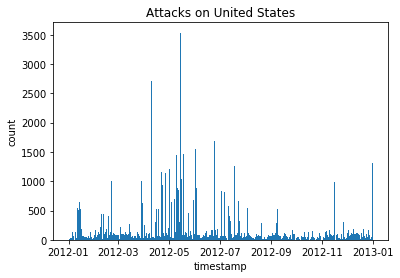

In [26]:
# Test your function here
plot_dataframe_static(us_df, "Attacks on United States")

**Expected output of** ```plot_dataframe_static()```:
<img src="./images/out8.png"/>

In [32]:
def plot_dataframe(input_df, title):
    """
    Problem 4c:
    Write the function to plot a bar graph of an aggregated count of the snort alerts each hour using plotly.
    First aggregate the input df by the hour, then create a plotly bar chart with timestamp as the x-axis and count as the y-axis
    :param: input_df - Input DataFrame to aggregate and plot.
    :param: title - Give a title to the graph
    :return: plotly figure data
    
    This is a difficult one. Ask the instructor for help if needed.
    """
    # Write your code here.
    df = input_df.copy()
    df['value'] = 1
    df_group = df.groupby(pd.Grouper(level='timestamp', freq='H'))['value'].agg('count')
    plotdata = [go.Bar(x=df_group.index, y=df_group.values)]
    layout = go.Layout(
        title=title,
        xaxis=dict(
            title=df_group.index.name
        ),
        yaxis=dict(
            title='count'
        )
    )
    fig = go.Figure(data=plotdata, layout=layout)
    iplot(fig)
    return fig

In [33]:
# Test your function here
fig = plot_dataframe(us_df, "Attacks on United States")

**Expected output of** ```plot_dataframe()```:
<img src="./images/out6.png" width="100%"/>

This is still not very useful to be frank. All the graph tells us is that we are seeing huge amount of malicious traffic originating from all outgoing to servers that are likely to be in United States in Nov 2012. Perhaps we can do some additional filtering to drill down on the granularity of the data?

## Static or Interactive Plots?
Matplotlib is a good library to provide static plots when compiling a data science report, but as you might have noticed, each plot is not very informative in standalone. That is why when we use matplotlib, we always add a discussion or description in words (much like what this paragraph does).

If you need plots to be self-sustaining with information due to whatever reason (e.g in a dashboard where it is not possible to provide a written discussion of plots that may differ from day-to-day), it is better to build interactive plots. This is where libraries such as plotly comes in.

## Given an IP, map it's attack pattern

Let's do something cool by building a "data driven" widget! We want to see what kind of attacks are hitting our internal servers.

In [37]:
import ipywidgets as widgets
from IPython.display import display

"""
Problem 4c:
Find the right place to call your plot_dataframe() function with the right parameters to complete the code below.
"""
# Complete your code below.

# IPython Widgets for Interactive UI
dir_select = widgets.Dropdown(
    options = ["Incoming", "Outgoing"],
    description = 'Direction:',
    value = "Incoming"
)

ip_select = widgets.Dropdown(
    options = snort_df[snort_df['src_country'] == 'Internal']['src_ip'].unique(),
    description = 'Threat:'
)

# Helper functions for interactivity
def filter_by_direction(direction):
    if direction == 'Incoming':
        sub_df = snort_df[snort_df['dst_country'] == 'Internal']
        ip_select.options = sub_df['dst_ip'].unique()
    else:
        sub_df = snort_df[snort_df['src_country'] == 'Internal']
        ip_select.options = sub_df['src_ip'].unique()


def filter_by_ip(ip):
    if dir_select.value == "Incoming":
        sub_df = snort_df[snort_df['dst_country'] == 'Internal']
        alert_df = sub_df[sub_df['dst_ip'] == ip]
    else:
        sub_df = snort_df[snort_df['src_country'] == 'Internal']
        alert_df = sub_df[sub_df['src_ip'] == ip]
        
    title = "Attack Patterns on {}".format(ip)
    plot_dataframe(alert_df, title)

    
dir_widget = widgets.interactive(filter_by_direction, direction=dir_select)
ip_widget = widgets.interactive(filter_by_ip, ip=ip_select)

display(dir_widget)
display(ip_widget)

interactive(children=(Dropdown(description='Direction:', options=('Incoming', 'Outgoing'), value='Incoming'), …

interactive(children=(Dropdown(description='Threat:', options=('192.168.88.10', '192.168.57.10', '192.168.31.1…

In [36]:
"""
Problem 4d:
Find the right place to call your plot_dataframe() function with the right parameters to complete the code below.
"""
# Complete your code below.

# IPython Widgets for Interactive UI
dir_select = widgets.Dropdown(
    options = ["Incoming", "Outgoing"],
    description = 'Direction:',
    value = "Incoming"
)

internal_df = snort_df[snort_df['src_country'] == 'Internal']
ip_list = internal_df['src_ip'].unique()
ip_init = ip_list[0]
ip_select = widgets.Dropdown(
    options = ip_list,
    description = 'IP:',
    value = ip_init
)

alert_select = widgets.Dropdown(
    options = internal_df[internal_df['src_ip'] == ip_init]['msg'].unique(),
    description = 'Threat:'
)

def filter_by_direction(direction):
    if direction == 'Incoming':
        sub_df = snort_df[snort_df['dst_country'] == 'Internal']
        ip_select.options = sub_df['dst_ip'].unique()
        ip_select.value = ip_select.options[0]
        alert_select.options = sub_df[sub_df['dst_ip'] == ip_select.value]['msg'].unique()
    else:
        sub_df = snort_df[snort_df['src_country'] == 'Internal']
        ip_select.options = sub_df['src_ip'].unique()
        ip_select.value = ip_select.options[0]
        alert_select.options = sub_df[sub_df['src_ip'] == ip_select.value]['msg'].unique()


def filter_by_ip(ip):
    if dir_select.value == "Incoming":
        sub_df = snort_df[snort_df['dst_country'] == 'Internal']
        alert_df = sub_df[sub_df['dst_ip'] == ip]
    else:
        sub_df = snort_df[snort_df['src_country'] == 'Internal']
        alert_df = sub_df[sub_df['src_ip'] == ip]
        
    ip_select.value = ip
    # Update options for alert_select dropdown
    alert_select.options = alert_df['msg'].unique()
    
def filter_by_msg(msg):
    if dir_select.value == "Incoming":
        sub_df = snort_df[snort_df['dst_country'] == 'Internal']
        alert_df = sub_df[sub_df['dst_ip'] == ip_select.value]
    else:
        sub_df = snort_df[snort_df['src_country'] == 'Internal']
        alert_df = sub_df[sub_df['src_ip'] == ip_select.value]
        
    df = alert_df[alert_df['msg'] == msg]
    title = "Attack Patterns of {} on {}".format(msg, ip_select.value)
    plot_dataframe(df, title)

    
dir_widget = widgets.interactive(filter_by_direction, direction=dir_select)
ip_widget = widgets.interactive(filter_by_ip, ip=ip_select)
msg_widget = widgets.interactive(filter_by_msg, msg=alert_select)

display(dir_widget)
display(ip_widget)
display(msg_widget)

interactive(children=(Dropdown(description='Direction:', options=('Incoming', 'Outgoing'), value='Incoming'), …

interactive(children=(Dropdown(description='IP:', options=('192.168.88.10', '192.168.57.10', '192.168.31.10', …

interactive(children=(Dropdown(description='Threat:', options=('ET CURRENT_EVENTS DRIVEBY Generic - Redirectio…

## Congratulations!

You have built your first data driven application that provides insights into SNORT IDS logs. While it's level of "usefulness" is subjective and depends on the opinion of people, you can pat yourself on the back for developing something that helps user answer the following question:

1. For a particular asset in my network, what are the threats as identified by the IDS?
2. Is a particular threat persistently happening over a period of time? Or is it just a one time event?

Take baby steps...

## Takeaways

1. Before the fun begins, the bulk of the work lies in data ingestion and data preprocessing.
2. Always try to store all ingested data with a schema and/or data structure. Centralized data storage in a data lake is ideal for convenient future data analytics work.
3. Data visualization is one of the (but not the only) tools of data analytics. Use it well.
4. IPython Notebook is a powerful application. You can use it for data storytelling or even build interactive applications with plotly and ipython widgets.
5. Pandas is the de-facto tool for data analysis on structured data. For unstructured data, it is more open ended.
5. A lot of insights can be gained without machine learning. Sometimes the information is already in the data. Just filter, transform and aggregate!

With point 5 said, you now have to basics to dive into more complex data analytics with machine learning next week.